<a href="https://colab.research.google.com/github/jacob-siby/sentiment_Analysis/blob/main/SentAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive/IRT_Project_SentiAnalysis')

In [4]:
!pip install google-api-python-client
!pip install google-auth google-auth-oauthlib google-auth-httplib2
!pip install demoji
!pip install pandas
!pip install langdetect

     |████████████████████████████████| 42 kB 1.3 MB/s 
     |████████████████████████████████| 981 kB 14.6 MB/s 
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993242 sha256=c10526b010200797775119b1a96fa3e188d9f99ac5e7d0d6a331fd4042622fb7
  Stored in directory: /root/.cache/pip/wheels/c5/96/8a/f90c59ed25d75e50a8c10a1b1c2d4c402e4dacfa87f3aff36a
Successfully built langdetect


In [6]:
pip install google-auth google-auth-oauthlib google-auth-httplib2


In [5]:
pip install demoji

In [6]:
import pandas as pd
#Reading file
comments = pd.read_csv('Tweet11.csv') #The column Company was extracted seprately
comments.head()

,tweet_id,writer,post_date,body,comment_num,retweet_num,like_num,Company
0,5.500000e+17,VisualStockRSRC,1420070457,"lx21 made $10,008 on $AAPL -Check it out! htt...",0,0,1,Apple
1,5.500000e+17,KeralaGuy77,1420070496,Insanity of today weirdo massive selling. $aap...,0,0,0,Apple
2,5.500000e+17,DozenStocks,1420070510,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,0,0,0,Amazon
3,5.500000e+17,ShowDreamCar,1420070807,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,0,0,1,Tesla
4,5.500000e+17,i_Know_First,1420071005,Swing Trading: Up To 8.91% Return In 14 Days h...,0,0,1,Apple


In [7]:
del comments['writer']
del comments['comment_num']
del comments['retweet_num']
del comments['like_num']
del comments['post_date']
del comments['tweet_id']
comments.head()

,body,Company
0,"lx21 made $10,008 on $AAPL -Check it out! htt...",Apple
1,Insanity of today weirdo massive selling. $aap...,Apple
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,Amazon
3,$GM $TSLA: Volkswagen Pushes 2014 Record Recal...,Tesla
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Apple


In [8]:
#removing company hashtag from body
comments['body'] = comments['body'].str.replace('AAPL','')
comments['body'] = comments['body'].str.replace('GOOG','')
comments['body'] = comments['body'].str.replace('GOOGL','')
comments['body'] = comments['body'].str.replace('AMZN','')
comments['body'] = comments['body'].str.replace('TSLA','')
comments['body'] = comments['body'].str.replace('MSFT','')
comments['body'] = comments['body'].str.replace('aapl','')
comments['body'] = comments['body'].str.replace('goog','')
comments['body'] = comments['body'].str.replace('googl','')
comments['body'] = comments['body'].str.replace('amzn','')
comments['body'] = comments['body'].str.replace('tsla','')
comments['body'] = comments['body'].str.replace('msft','')


In [9]:
comments.body[1]

'Insanity of today weirdo massive selling. $ bid up 45 cents after hours after non stop selling in trading hours'

In [10]:
comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14971 entries, 0 to 14970
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   body     14971 non-null  object
 1   Company  14971 non-null  object
dtypes: object(2)
memory usage: 234.0+ KB


In [11]:
#Removing unwanted emojis c
import demoji




In [12]:
comments.to_csv("Tweet2.csv",index = False)

In [13]:
demoji.download_codes()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The demoji.download_codes attribute is deprecated and will be removed from demoji in a future version. It is an unused attribute as emoji codes are now distributed directly with the demoji package.
  """Entry point for launching an IPython kernel.


In [14]:
comments.head()

,body,Company
0,"lx21 made $10,008 on $ -Check it out! http://...",Apple
1,Insanity of today weirdo massive selling. $ bi...,Apple
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,Amazon
3,$GM $: Volkswagen Pushes 2014 Record Recall Ta...,Tesla
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Apple


In [15]:
cm= pd.read_csv('Tweet2.csv')

In [16]:
#comments['clean_comments'] = comments['body'].apply(lambda x: demoji.replace(x,""))

In [17]:
from textblob import TextBlob
from langdetect import detect

In [18]:
comments['language'] = 0

In [19]:
count = 0
for i in range(0,len(comments)):


  temp = comments['body'].iloc[i]
  count += 1
  try:
    comments['language'].iloc[i] = detect(temp)
  except:
    comments['language'].iloc[i] = "error"

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [20]:
comments.head()

,body,Company,language
0,"lx21 made $10,008 on $ -Check it out! http://...",Apple,en
1,Insanity of today weirdo massive selling. $ bi...,Apple,en
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,Amazon,en
3,$GM $: Volkswagen Pushes 2014 Record Recall Ta...,Tesla,en
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Apple,en


In [80]:
comments[comments['language']=='en']['language'].value_counts()

en    14273
Name: language, dtype: int64

In [21]:
english_comm = comments[comments['language'] == 'en']

In [22]:
english_comm.to_csv("english_comments.csv",index = False)

In [23]:
#loading dataset with only english tweets
en_comments = pd.read_csv('english_comments.csv',encoding='utf8',error_bad_lines=False)
en_comments.head()

,body,Company,language
0,"lx21 made $10,008 on $ -Check it out! http://...",Apple,en
1,Insanity of today weirdo massive selling. $ bi...,Apple,en
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,Amazon,en
3,$GM $: Volkswagen Pushes 2014 Record Recall Ta...,Tesla,en
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Apple,en


In [24]:
en_comments.shape

(14257, 3)

In [25]:
regex = r"[^0-9A-Za-z'\t]"
copy = en_comments.copy()
import re
copy['reg'] = copy['body'].apply(lambda x:re.findall(regex,x))
copy['regular_comments'] = copy['body'].apply(lambda x:re.sub(regex,"  ",x))

In [26]:
copy.head()

,body,Company,language,reg,regular_comments
0,"lx21 made $10,008 on $ -Check it out! http://...",Apple,en,"[ , , $, ,, , , , $, , -, , , !, , :, ...",lx21 made 10 008 on Check it ...
1,Insanity of today weirdo massive selling. $ bi...,Apple,en,"[ , , , , , ., , $, , , , , , , , ...",Insanity of today weirdo massive selling ...
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,Amazon,en,"[&, , #, , , $, , $, , $, , $, , $, , ...",S P100 Stocks Performance HD LOW ...
3,$GM $: Volkswagen Pushes 2014 Record Recall Ta...,Tesla,en,"[$, , $, :, , , , , , , , , :, /, /, ...",GM Volkswagen Pushes 2014 Record ...
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Apple,en,"[ , :, , , , ., %, , , , , , :, /, /, ...",Swing Trading Up To 8 91 Return In ...


In [27]:
copy.shape

(14257, 5)

#Checking polarity

In [28]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import scipy


import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

In [29]:
data = copy

data.head()

,body,Company,language,reg,regular_comments
0,"lx21 made $10,008 on $ -Check it out! http://...",Apple,en,"[ , , $, ,, , , , $, , -, , , !, , :, ...",lx21 made 10 008 on Check it ...
1,Insanity of today weirdo massive selling. $ bi...,Apple,en,"[ , , , , , ., , $, , , , , , , , ...",Insanity of today weirdo massive selling ...
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,Amazon,en,"[&, , #, , , $, , $, , $, , $, , $, , ...",S P100 Stocks Performance HD LOW ...
3,$GM $: Volkswagen Pushes 2014 Record Recall Ta...,Tesla,en,"[$, , $, :, , , , , , , , , :, /, /, ...",GM Volkswagen Pushes 2014 Record ...
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Apple,en,"[ , :, , , , ., %, , , , , , :, /, /, ...",Swing Trading Up To 8 91 Return In ...


In [30]:
data['polarity'] = data['regular_comments'].apply(lambda x: TextBlob(x).sentiment.polarity)
data.head()

,body,Company,language,reg,regular_comments,polarity
0,"lx21 made $10,008 on $ -Check it out! http://...",Apple,en,"[ , , $, ,, , , , $, , -, , , !, , :, ...",lx21 made 10 008 on Check it ...,0.00
1,Insanity of today weirdo massive selling. $ bi...,Apple,en,"[ , , , , , ., , $, , , , , , , , ...",Insanity of today weirdo massive selling ...,0.00
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,Amazon,en,"[&, , #, , , $, , $, , $, , $, , $, , ...",S P100 Stocks Performance HD LOW ...,0.25
3,$GM $: Volkswagen Pushes 2014 Record Recall Ta...,Tesla,en,"[$, , $, :, , , , , , , , , :, /, /, ...",GM Volkswagen Pushes 2014 Record ...,0.25
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Apple,en,"[ , :, , , , ., %, , , , , , :, /, /, ...",Swing Trading Up To 8 91 Return In ...,0.00


In [31]:
data = data.sample(frac=1).reset_index(drop=True)
data['pol_cat']  = 0
data['pol_cat'][data.polarity > 0] = 1   #positive
data['pol_cat'][data.polarity <= 0] = -1 #negative
data.head()

,body,Company,language,reg,regular_comments,polarity,pol_cat
0,$SPY IS NEARING 200. $$$$$$$$$$$$$ $ in the 105's,Apple,en,"[$, , , , ., , $, $, $, $, $, $, $, $, $, ...",SPY IS NEARING 200 ...,0.000000,-1
1,$ beast,Apple,en,"[$, ]",beast,0.000000,-1
2,Top 10 searched #stocks of #2014 $ $FB $BABA $...,Apple,en,"[ , , , #, , , #, , $, , $, , $, , $, ...",Top 10 searched stocks of 2014 ...,0.500000,1
3,"""@WolfSnap: @BloodOnTheStreets Yes! Buy! Buy! $""",Apple,en,"["", @, :, , @, , !, , !, , !, , $, ""]",WolfSnap BloodOnTheStreets Yes Bu...,0.000000,-1
4,"Join me on tsū, is sharing social revenues wit...",Apple,en,"[ , , , ū, ,, , , , , , , , , ., , ...",Join me on ts is sharing social rev...,0.033333,1


In [32]:
data['pol_cat'].value_counts() #total

-1    8029
 1    6228
Name: pol_cat, dtype: int64

In [33]:
#Apples polarity distribution
data[data['Company']=='Apple']['pol_cat'].value_counts()


-1    4539
 1    4184
Name: pol_cat, dtype: int64

In [34]:
a=data[data['Company']=='Apple'].shape[0]
data[data['Company']=='Apple'].shape

(8723, 7)

In [35]:
#Teslas polarity distribution
data[data['Company']=='Tesla']['pol_cat'].value_counts()

-1    961
 1    610
Name: pol_cat, dtype: int64

In [36]:
t=data[data['Company']=='Tesla'].shape[0]
data[data['Company']=='Tesla'].shape

(1571, 7)

In [37]:
#Amazon polarity distribution
data[data['Company']=='Amazon']['pol_cat'].value_counts()

-1    840
 1    445
Name: pol_cat, dtype: int64

In [38]:
am=data[data['Company']=='Amazon'].shape[0]
data[data['Company']=='Amazon'].shape

(1285, 7)

In [39]:
#Google polarity distribution
data[data['Company']=='Google']['pol_cat'].value_counts()

-1    1318
 1     779
Name: pol_cat, dtype: int64

In [40]:
g=data[data['Company']=='Google'].shape[0]
data[data['Company']=='Google'].shape

(2097, 7)

In [41]:
#Microsoft polarity distribution
data[data['Company']=='Microsoft']['pol_cat'].value_counts()

-1    371
 1    210
Name: pol_cat, dtype: int64

In [42]:
m=data[data['Company']=='Microsoft'].shape[0]
data[data['Company']=='Microsoft'].shape

(581, 7)

In [43]:
import matplotlib.pyplot as plt

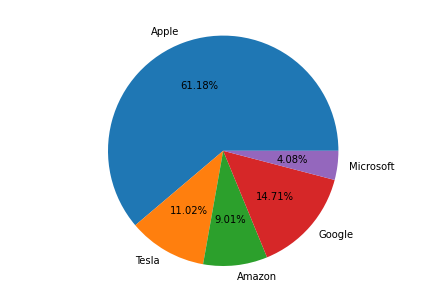

In [47]:
#Comment distribution
from matplotlib import pyplot as plt
import numpy as np
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
comp = ['Apple', 'Tesla', 'Amazon', 'Google', 'Microsoft']
c_num = [a,t,am,g,m]
ax.pie(c_num, labels = comp,autopct='%1.2f%%')
plt.show()

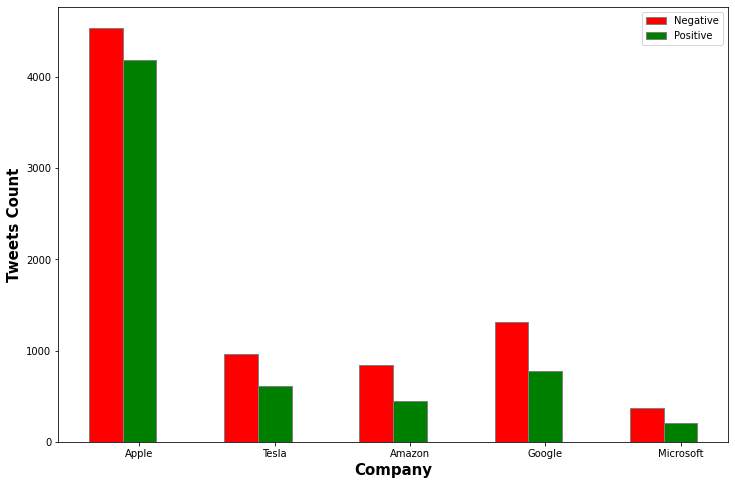

In [75]:
#+ve -ve distribution
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8))

# set height of bar
neg = [4539, 961, 840, 1318, 371]
pos = [4184, 610, 445, 779,210]


# Set position of bar on X axis
br1 = np.arange(len(neg))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, neg, color ='r', width = barWidth,
		edgecolor ='grey', label ='Negative')
plt.bar(br2, pos, color ='g', width = barWidth,
		edgecolor ='grey', label ='Positive')

# Adding Xticks
plt.xlabel('Company', fontweight ='bold', fontsize = 15)
plt.ylabel('Tweets Count', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(IT))],
		['Apple', 'Tesla', 'Amazon', 'Google', 'Microsoft'])

plt.legend()
plt.show()



In [77]:
copy.head()

,body,Company,language,reg,regular_comments,polarity
0,"lx21 made $10,008 on $ -Check it out! http://...",Apple,en,"[ , , $, ,, , , , $, , -, , , !, , :, ...",lx21 made 10 008 on Check it ...,0.00
1,Insanity of today weirdo massive selling. $ bi...,Apple,en,"[ , , , , , ., , $, , , , , , , , ...",Insanity of today weirdo massive selling ...,0.00
2,S&P100 #Stocks Performance $HD $LOW $SBUX $TGT...,Amazon,en,"[&, , #, , , $, , $, , $, , $, , $, , ...",S P100 Stocks Performance HD LOW ...,0.25
3,$GM $: Volkswagen Pushes 2014 Record Recall Ta...,Tesla,en,"[$, , $, :, , , , , , , , , :, /, /, ...",GM Volkswagen Pushes 2014 Record ...,0.25
4,Swing Trading: Up To 8.91% Return In 14 Days h...,Apple,en,"[ , :, , , , ., %, , , , , , :, /, /, ...",Swing Trading Up To 8 91 Return In ...,0.00


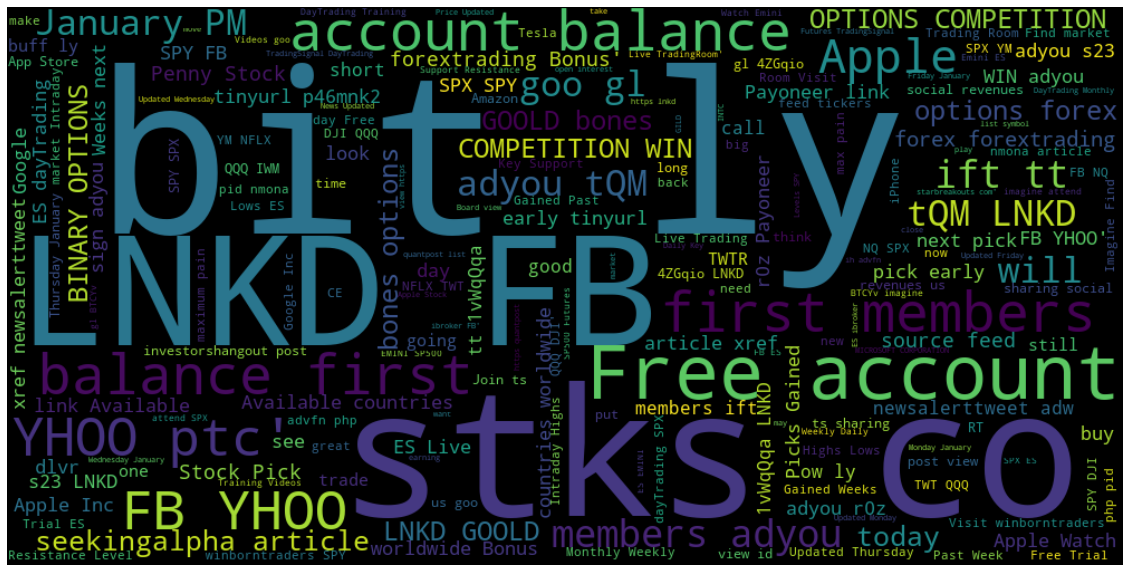

In [78]:
#word cloud
from wordcloud import WordCloud
import numpy as np
from PIL import Image
list=[]
for i in copy["regular_comments"] :
    list.append(i)
slist = str(list)

wordcloud = WordCloud(width=1000, height=500).generate(slist)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()